In [1]:
import numpy as np 
import pylab as pl
from support_conv import Support # Class that implements Laplace and inverse Laplace transfrom

Construct a set of scale-invariant log-spaced filters. Peak times are log spaced between tstr_min and tstr_max. Parameter buff_len sets the number of filters. Duration of the impulse reponse is Nt (choose Nt such that it's at least twice as large as tstr_min - to make sure that the last filter decays to about 0). Parameter k controls width of the filters. Parameter g control amplitude (g=0 power-law decay of amplitude; g=1 equal amplitude). Parameter dt sets temporal resolution. 

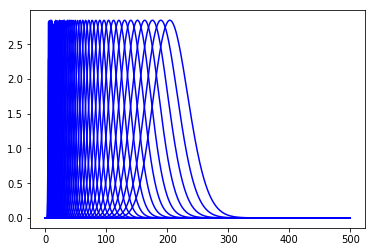

In [2]:
Nt=500
dt=0.001
filters = Support(tstr_min=0.005, tstr_max=0.2, buff_len=50, k=50, dt=dt, g=1, Nt=Nt)
_ = pl.plot(filters.til_f.T, color='blue')

We will use filter with power-law decay of amplitude (g=0) - this will ensure that the impulse response of each filter sums to 1.

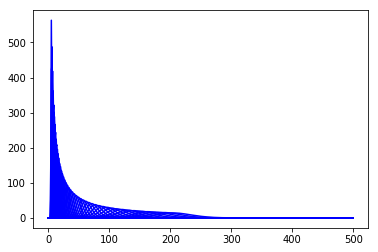

In [3]:
filters = Support(tstr_min=0.005, tstr_max=0.2, buff_len=50, k=50, dt=dt, g=0, Nt=Nt)
_ = pl.plot(filters.til_f.T, color='blue')

Here is an example of how the filters can be applied to some simple signal x

In [4]:
Nx = 600
x = np.zeros((Nx,))
x[500] = 1
x[450] = 1
x[300] = 1

Each filter is convolved with the input signal (that's why we loop trhough buff_len). We keep only first Nt results of the convolution. 

In [5]:
til_f_out = np.zeros((filters.buff_len,Nx))
for tstr_ind in range(filters.buff_len):
    tmp = np.convolve(filters.til_f[tstr_ind,:],x)
    til_f_out[tstr_ind,:] = tmp[0:Nx]

Filtered input signal is easy to intepret as a sum of two impulse responses each shifted in time by the amount that offset of the two delta poulses from the input signal.  

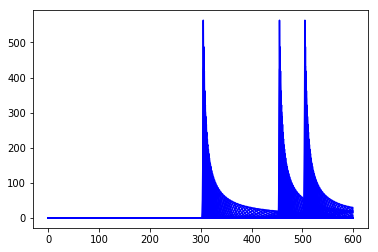

In [6]:
_ = pl.plot(til_f_out.T, color='blue')

Here is how the log-compressed reconstruction of the input signal looks like at time Nx (at the last time point of the input signal) for the range between tstr_min and tstr_max points in the past. Notice that we could have plotted recontruction of the input signal at any point in the past, by replacing -1 below with desired moment in the past. The x axis corresponds to Taustarlist which is a log-spaced vector from tstr_min to tstr_max with buff_len elements. It has negative sign since we are looking at a reconsturction of x across the past. Notice that the output always represents last 200 points since tstr_max/dt = 200, therefore the first delta poulse is not visible.  

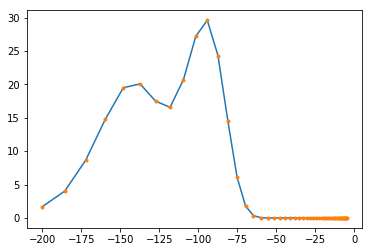

In [7]:
_ = pl.plot(-filters.Taustarlist/dt, til_f_out[:,-1])
_ = pl.plot(-filters.Taustarlist/dt, til_f_out[:,-1],'.')

Here are the values of Taustarlist.

In [8]:
print(filters.Taustarlist)

[0.005      0.00539095 0.00581246 0.00626694 0.00675695 0.00728527
 0.0078549  0.00846907 0.00913126 0.00984523 0.01061503 0.01144501
 0.01233989 0.01330474 0.01434503 0.01546666 0.01667599 0.01797988
 0.01938572 0.02090148 0.02253575 0.02429781 0.02619764 0.02824603
 0.03045457 0.0328358  0.03540321 0.03817137 0.04115597 0.04437394
 0.04784351 0.05158437 0.05561773 0.05996645 0.0646552  0.06971056
 0.07516119 0.08103801 0.08737433 0.09420609 0.10157202 0.10951388
 0.11807672 0.12730908 0.13726332 0.14799587 0.15956759 0.1720441
 0.18549615 0.2       ]


Now let's construct a bit more complicated signal as AR(2) process. 

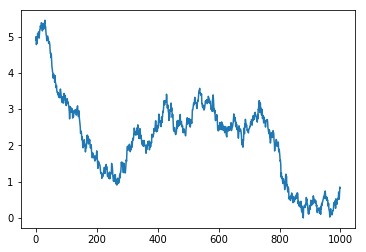

In [9]:
Nx = 1000
x = np.zeros((Nx,))
x[0] = 0.1
x[1] = 0.2
a1 = 0.8
a2 = 0.2
for t in np.arange(2,len(x)):
    x[t] = a1*x[t-1] + a2*x[t-2] + np.random.normal(0,0.1)
x = x - min(x)
_ = pl.plot(x)

We again apply the filters to the inputs signal in the same way as before.

In [10]:
til_f_out = np.zeros((filters.buff_len,Nx))
for tstr_ind in range(filters.buff_len):
    tmp = np.convolve(filters.til_f[tstr_ind,:],x)
    til_f_out[tstr_ind,:] = tmp[0:Nx]

Since the signal is noisy the output of the convolution looks complicated.  

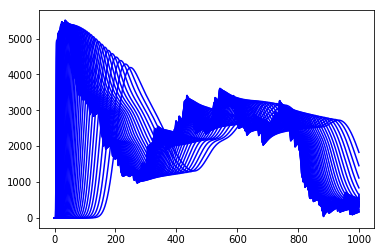

In [11]:
_ = pl.plot(til_f_out.T, color='blue')

However, if we look at the reconstruction of the input signal at its last point by plotting the last element of the filter output as a function of taustarlist we get a signal that is a log-compressed version of the input signal. 

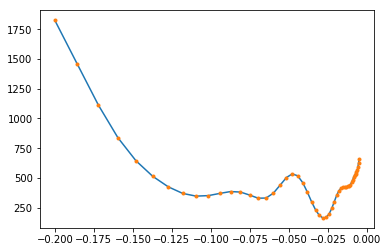

In [12]:
_ = pl.plot(-filters.Taustarlist, til_f_out[:,-1])
_ = pl.plot(-filters.Taustarlist, til_f_out[:,-1],'.')

To illustrate the log-compression we can plot the two signals together. Here we are looking at last 200 samples of x and last value of the filter output across taustar. We added 200 to taustar to make it possitive (since that's the way we're plotting the input data). We also scale the amplitude of the filtered signal by dt. 

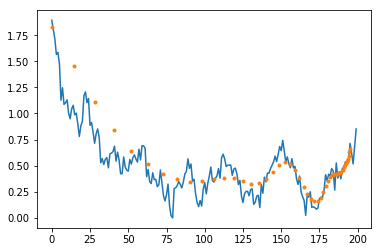

In [13]:
pl.plot(x[-201:-1])
_ = pl.plot(-filters.Taustarlist/dt+200, til_f_out[:,-1]*dt,'.')

We can look at the log-compressed memory of the input signal not only for the last 200 points, but for different moments in the past. For instance if we want the memory of the signal between 500 and 700 time steps in the past we can look at the output of the filter 500 steps in the past. Notice again that the output always represents last 200 points since tstr_max/dt = 200. 

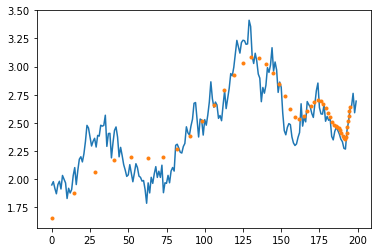

In [14]:
pl.plot(x[-700:-500])
_ = pl.plot(-filters.Taustarlist/dt+200, til_f_out[:,-500]*dt,'.')

Similar for log-compressed input between 700 and 900 steps in the past.

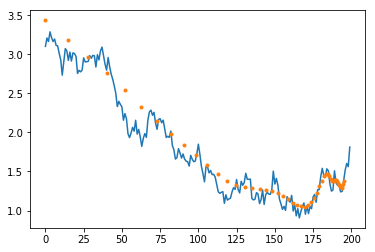

In [15]:
pl.plot(x[-900:-700])
_ = pl.plot(-filters.Taustarlist/dt+200, til_f_out[:,-700]*dt,'.')

Notice that an alternative implementation of this could be done in a neural netwrok by setting an activation function to be the impulse response (this can be impkemented in e.g. Tensorflow or Pytorch). 

Finally, let's look at the role of k. Instead of 50 we can choose a smaller value, say 10. This results in wider receptive fields of the filters

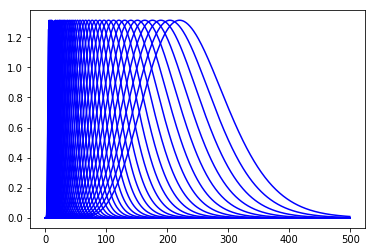

In [16]:
filters = Support(tstr_min=0.005, tstr_max=0.2, buff_len=50, k=10, dt=dt, g=1, Nt=Nt)
_ = pl.plot(filters.til_f.T, color='blue')

Now we can test the impact of k on the log-compressed memory.

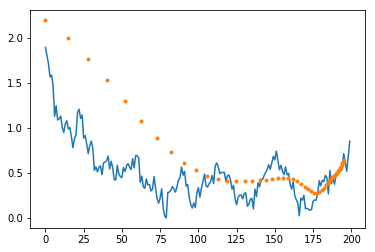

In [18]:
filters = Support(tstr_min=0.005, tstr_max=0.2, buff_len=50, k=10, dt=dt, g=0, Nt=Nt)
til_f_out = np.zeros((filters.buff_len,Nx))
for tstr_ind in range(filters.buff_len):
    tmp = np.convolve(filters.til_f[tstr_ind,:],x)
    til_f_out[tstr_ind,:] = tmp[0:Nx]
pl.plot(x[-201:-1])
_ = pl.plot(-filters.Taustarlist/dt+200, til_f_out[:,-1]*dt,'.')

The output signal is now more smooth than before - each orange point is a weighted sum across more points than before (sicne the receptive fields are wider). 